# Breast Cancer Text Mining Julia 

## Introduction
Breast cancer is the most common type of cancer diagnosed among women and is the second leading cause of cancer death. 3
Approximately 252,710 new cases of invasive breast cancer and 63,410 cases of in situ breast carcinoma were expected to be diagnosed among US women in 2017, and 40,610 women are expected to die from this disease alone.3 Overall, breast cancer mortality rates have decreased by 39%...

## Load Packages and Custom Function

In [4]:
# install all packages
#Pkg.add("Gadfly")
#Pkg.add("Query")
#Pkg.add("Vega")

# add all packages here
using DataFrames
using Gadfly
using Vega # for word cloud
using TextAnalysis #, DimensionalityReduction, Clustering
using Plotly
using Query

# Add all custom functions here
include("1.4.medline.jl")
include("fetch_full_article.jl")




fetchFullArticleFromPmc (generic function with 2 methods)

## Analysis
Text mining can be used to discover these knowledge patterns or hypotheses in helping to solve biomedical questions. We will perform 3 analysis i.e on treatment, diagnosis and prevention

### Diagnosis
Starting by creating a dataframe of diagnosis metadata for the year 2000 to  2018

In [5]:
# diagnosis for the year 2000 to  2018 (limit is 1000 for now)
df = @time  fetchBreastCancerArticles("breast cancer", "diagnosis",2015,2018,100)
df

 17.202451 seconds (2.09 M allocations: 149.338 MiB, 1.68% gc time)


,pmcid,pmid,date_published,title
1,PMC5895432,29595684,20180330,"Gastric metastasis from invasive lobular breast cancer, mimicking primary gastric"
2,PMC5895387,29595655,20180330,The prognostic value of circulating cell-free DNA in breast cancer: A
3,PMC5834809,29345736,20180222,Palbociclib in combination with letrozole as first‐line treatment for advanced
4,PMC5839868,29443748,20180216,Ultrasound combined with fine needle aspiration cytology for the assessment of
5,PMC5810980,29438405,20180213,Multiplatform plasma metabolic and lipid fingerprinting of breast cancer: A pilot
6,PMC5805287,29420578,20180208,Evolutionary Wavelet Neural Network ensembles for breast cancer and Parkinson’s
7,PMC5784895,29370209,20180125,"Evaluation of drug mechanism and efficacy of a novel anti-angiogenic agent,"
8,PMC5770054,29338058,20180116,Menstrual and reproductive factors and risk of breast cancer: A case-control
9,PMC5816103,29327245,20180111,High nuclear MSK1 is associated with longer survival in breast cancer patients.
10,PMC5764434,29324832,20180111,Differential microRNA expression in breast cancer with different onset age.


Then fetch full artcile from PMC and store it as dataframe

In [6]:
# getch and save in a file called "diagnosis_full_article".csv
df_full_text = fetchFullArticleFromPmc(df, "diagnosis_full_article")

head(df_full_text)

downloading: PMC5895432


  likely near In[6]:2


downloading: PMC5895387


Progress:   1%|                                         |  ETA: 0:26:21

downloading: PMC5834809


Progress:   2%|█                                        |  ETA: 0:15:16

downloading: PMC5839868


Progress:   3%|█                                        |  ETA: 0:11:04

downloading: PMC5810980


Progress:   4%|██                                       |  ETA: 0:08:49

downloading: PMC5805287


Progress:   5%|██                                       |  ETA: 0:09:59

downloading: PMC5784895


Progress:   6%|██                                       |  ETA: 0:08:57

downloading: PMC5770054


Progress:   7%|███                                      |  ETA: 0:10:18

downloading: PMC5816103


Progress:   8%|███                                      |  ETA: 0:09:44

downloading: PMC5764434


Progress:   9%|████                                     |  ETA: 0:09:02

downloading: PMC5755747


Progress:  10%|████                                     |  ETA: 0:09:00

downloading: PMC5755729


Progress:  11%|█████                                    |  ETA: 0:08:23

downloading: PMC5834810


Progress:  12%|█████                                    |  ETA: 0:08:09

downloading: PMC5746234


Progress:  13%|█████                                    |  ETA: 0:07:35

downloading: PMC5758242


Progress:  14%|██████                                   |  ETA: 0:07:31

downloading: PMC5738061


Progress:  15%|██████                                   |  ETA: 0:07:09

downloading: PMC5737960


Progress:  16%|███████                                  |  ETA: 0:06:52

downloading: PMC5815817


Progress:  17%|███████                                  |  ETA: 0:06:36

downloading: PMC5815705


Progress:  18%|███████                                  |  ETA: 0:06:16

downloading: PMC5731757


Progress:  19%|████████                                 |  ETA: 0:05:57

downloading: PMC5737231


Progress:  20%|████████                                 |  ETA: 0:05:47

downloading: PMC5728894


Progress:  21%|█████████                                |  ETA: 0:05:33

downloading: PMC5728863


Progress:  22%|█████████                                |  ETA: 0:05:19

downloading: PMC5720724


Progress:  23%|█████████                                |  ETA: 0:05:06

downloading: PMC5718505


Progress:  24%|██████████                               |  ETA: 0:05:00

downloading: PMC5733385


Progress:  25%|██████████                               |  ETA: 0:04:50

downloading: PMC5728780


Progress:  26%|███████████                              |  ETA: 0:04:38

downloading: PMC5706725


Progress:  27%|███████████                              |  ETA: 0:04:28

downloading: PMC5708960


Progress:  28%|███████████                              |  ETA: 0:04:29

downloading: PMC5754401


Progress:  29%|████████████                             |  ETA: 0:04:21

downloading: PMC5695816


Progress:  30%|████████████                             |  ETA: 0:04:15

downloading: PMC5704850


Progress:  31%|█████████████                            |  ETA: 0:04:18

downloading: PMC5704795


Progress:  32%|█████████████                            |  ETA: 0:04:10

downloading: PMC5687766


Progress:  33%|██████████████                           |  ETA: 0:04:02

downloading: PMC5685588


Progress:  34%|██████████████                           |  ETA: 0:04:15

downloading: PMC5727322


Progress:  35%|██████████████                           |  ETA: 0:05:26

downloading: PMC5690765


Progress:  36%|███████████████                          |  ETA: 0:05:14

downloading: PMC5690700


Progress:  37%|███████████████                          |  ETA: 0:05:05

downloading: PMC5680801


Progress:  38%|████████████████                         |  ETA: 0:04:56

downloading: PMC5680747


Progress:  39%|████████████████                         |  ETA: 0:04:48

downloading: PMC5794829


Progress:  40%|████████████████                         |  ETA: 0:04:41

downloading: PMC5674849


Progress:  41%|█████████████████                        |  ETA: 0:04:32

downloading: PMC5682818


Progress:  42%|█████████████████                        |  ETA: 0:04:24

downloading: PMC5682791


Progress:  43%|██████████████████                       |  ETA: 0:04:15

downloading: PMC5682787


Progress:  44%|██████████████████                       |  ETA: 0:04:08

downloading: PMC5667880


Progress:  45%|██████████████████                       |  ETA: 0:04:02

downloading: PMC5667799


Progress:  46%|███████████████████                      |  ETA: 0:03:56

downloading: PMC5706630


Progress:  47%|███████████████████                      |  ETA: 0:03:48

downloading: PMC5738007


Progress:  48%|████████████████████                     |  ETA: 0:03:41

downloading: PMC5671859


Progress:  49%|████████████████████                     |  ETA: 0:03:35

downloading: PMC5727320


Progress:  50%|████████████████████                     |  ETA: 0:03:28

downloading: PMC5657998


Progress:  51%|█████████████████████                    |  ETA: 0:03:22

downloading: PMC5656317


Progress:  52%|█████████████████████                    |  ETA: 0:03:55

downloading: PMC5662371


Progress:  53%|██████████████████████                   |  ETA: 0:03:47

downloading: PMC5662364


Progress:  54%|██████████████████████                   |  ETA: 0:03:41

downloading: PMC5648156


Progress:  55%|███████████████████████                  |  ETA: 0:03:34

downloading: PMC5646774


Progress:  56%|███████████████████████                  |  ETA: 0:03:33

downloading: PMC5646764


Progress:  57%|███████████████████████                  |  ETA: 0:03:26

downloading: PMC5790983


Progress:  58%|████████████████████████                 |  ETA: 0:03:19

downloading: PMC5662317


Progress:  59%|████████████████████████                 |  ETA: 0:03:12

downloading: PMC5636879


Progress:  60%|█████████████████████████                |  ETA: 0:03:06

downloading: PMC5762610


Progress:  61%|█████████████████████████                |  ETA: 0:03:01

downloading: PMC5673950


Progress:  62%|█████████████████████████                |  ETA: 0:02:54

downloading: PMC5633195


Progress:  63%|██████████████████████████               |  ETA: 0:02:48

downloading: PMC5630120


Progress:  64%|██████████████████████████               |  ETA: 0:02:42

downloading: PMC5673948


Progress:  65%|███████████████████████████              |  ETA: 0:02:37

downloading: PMC5673913


Progress:  66%|███████████████████████████              |  ETA: 0:02:31

downloading: PMC5626550


Progress:  67%|███████████████████████████              |  ETA: 0:02:25

downloading: PMC5697496


Progress:  68%|████████████████████████████             |  ETA: 0:02:20

downloading: PMC5724944
downloading: PMC5626274


Progress:  70%|█████████████████████████████            |  ETA: 0:02:09

downloading: PMC5619732


Progress:  71%|█████████████████████████████            |  ETA: 0:02:03

downloading: PMC5614529


Progress:  72%|██████████████████████████████           |  ETA: 0:01:58

downloading: PMC5612990


Progress:  73%|██████████████████████████████           |  ETA: 0:01:53

downloading: PMC5617696


Progress:  74%|██████████████████████████████           |  ETA: 0:01:49

downloading: PMC5609040


Progress:  75%|███████████████████████████████          |  ETA: 0:01:44

downloading: PMC5608198


Progress:  76%|███████████████████████████████          |  ETA: 0:01:39

downloading: PMC5599036


Progress:  77%|████████████████████████████████         |  ETA: 0:01:38

downloading: PMC5602452


Progress:  78%|████████████████████████████████         |  ETA: 0:01:34

downloading: PMC5672806


Progress:  79%|████████████████████████████████         |  ETA: 0:01:30

downloading: PMC5595337


ERROR FlateFilter: stop reading corrupt stream due to a DataFormatException
Progress:  80%|█████████████████████████████████        |  ETA: 0:01:25

downloading: PMC5595304


Progress:  81%|█████████████████████████████████        |  ETA: 0:01:20

downloading: PMC5595280


Progress:  82%|██████████████████████████████████       |  ETA: 0:01:16

downloading: PMC5711975


Progress:  83%|██████████████████████████████████       |  ETA: 0:01:11

downloading: PMC5711560


Progress:  84%|██████████████████████████████████       |  ETA: 0:01:07

downloading: PMC5590926


Progress:  85%|███████████████████████████████████      |  ETA: 0:01:03

downloading: PMC5590847


Progress:  86%|███████████████████████████████████      |  ETA: 0:00:59

downloading: PMC5590816


Progress:  87%|████████████████████████████████████     |  ETA: 0:00:55

downloading: PMC5589175


Progress:  88%|████████████████████████████████████     |  ETA: 0:00:51

downloading: PMC5587293


Progress:  89%|████████████████████████████████████     |  ETA: 0:00:53

downloading: PMC5583984


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:48

downloading: PMC5581176


Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:43

downloading: PMC5577624


Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:39

downloading: PMC5574574


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:34

downloading: PMC5804827


Progress:  94%|███████████████████████████████████████  |  ETA: 0:00:29

downloading: PMC5668502
downloading: PMC5568295


Progress:  96%|███████████████████████████████████████  |  ETA: 0:00:19

downloading: PMC5571723


Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:14

downloading: PMC5555566


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:09

downloading: PMC5555564


Progress: 100%|█████████████████████████████████████████| Time: 0:07:49


6×6 DataFrames.DataFrame
│ Row │ pmcid        │ pmid       │ date_published │
├─────┼──────────────┼────────────┼────────────────┤
│ 1   │ "PMC5895432" │ "29595684" │ "20180330"     │
│ 2   │ "PMC5895387" │ "29595655" │ "20180330"     │
│ 3   │ "PMC5834809" │ "29345736" │ "20180222"     │
│ 4   │ "PMC5839868" │ "29443748" │ "20180216"     │
│ 5   │ "PMC5810980" │ "29438405" │ "20180213"     │
│ 6   │ "PMC5805287" │ "29420578" │ "20180208"     │

│ Row │ title                                                                               │
├─────┼─────────────────────────────────────────────────────────────────────────────────────┤
│ 1   │ "Gastric metastasis from invasive lobular breast cancer, mimicking primary gastric" │
│ 2   │ "The prognostic value of circulating cell-free DNA in breast cancer: A"             │
│ 3   │ "Palbociclib in combination with letrozole as first‐line treatment for advanced"    │
│ 4   │ "Ultrasound combined with fine needle aspiration cytology for the assessment of"    │
│ 5   │ "Multiplatform plasma metabolic and lipid fingerprinting of breast cancer: A pilot" │
│ 6   │ "Evolutionary Wavelet Neural Network ensembles for breast cancer and Parkinson’s"   │

│ Row │ pmcUrl                                                     │
├─────┼────────────────────────────────────────────────────────────┤
│ 1   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5895432/pdf" │
│ 2   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5895387/pdf" │
│ 3   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5834809/pdf" │
│ 4   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5839868/pdf" │
│ 5   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5810980/pdf" │
│ 6   │ "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5805287/pdf" │

│ Row │ fullText                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Before we do any data cleaning lets make sure that the articles are relevant by plotting wordcloud

In [15]:

articles_array =df_full_text[:fullText]
wc = wordcloud(x = articles_array)
colorscheme!(wc, palette = ("Spectral", 11))


Vega.VegaVisualization
  name: String "wordcloud"
  width: Int64 800
  height: Int64 400
  padding: String "auto"
  viewport: Void nothing
  background: Void nothing
  data: Array{Vega.VegaData}((1,))
  scales: Array{Vega.VegaScale}((1,))
  axes: Void nothing
  marks: Array{Vega.VegaMark}((1,))
  legends: Void nothing
  signals: Void nothing
  predicates: Void nothing
  modify: Void nothing

### Data Cleaning 
Looks like we have to clean and remove a few stop words.


In [24]:
# conver to corpus
arrayOfSdDoc = []
for row in eachrow(df_full_text)
      push!(arrayOfSdDoc,StringDocument(row[:fullText]))
end

# convert to corpus
corpus = Corpus(arrayOfSdDoc)
#standardize
standardize!(corpus, StringDocument)
#normalizes 
stem!(corpus) 
#remove cases
remove_case!(corpus)
# remove punctuations
remove_punctuation!(corpus)
# remove numbers
remove_numbers!(corpus)
#remove 
remove_prepositions!(corpus)
# remove 
remove_pronouns!(corpus)
# remove
remove_stop_words!(corpus)
# remove white space
#remove_whitespace!(corpus)
# remove non letters
remove_nonletters!(corpus)
# remove custom stop words
remove_words!(corpus, ["et","al", "journal", "https", "org","pmid", "fig"])



Start Analysis

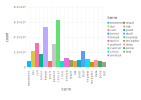

In [25]:
#using DimensionalityReduction, Clustering

update_lexicon!(corpus)
#update_inverse_index!(corpus)
lexicon_df = DataFrame(term=collect(keys(corpus.lexicon)), count=collect(values(corpus.lexicon)))

lexicon_df = lexicon_df |> @query(i, begin
            @where i.count>700
            @select {i.term, i.count}
          end) |> DataFrame

 Gadfly.plot(lexicon_df,y="count", x="term", Geom.bar, color="term")


In [ ]:

 #convert(DataFrame, d)
#plot(corpus.lexicon, x="SepalLength", y="SepalWidth", Geom.point)
#plot(x=rand(10), y=rand(10))
#NGramCorpus(corpus)

# corpus_df =convert(DataFrame, corpus)

# m = DocumentTermMatrix(corpus)

# D = dtm(m, :dense)
# D

### Treatment

In [8]:
# Treatment


## Appendix




In [9]:
# using R code
